<a href="https://colab.research.google.com/github/anushka10079/BA_Anushka/blob/main/AnushkaSingh_BA1_Round1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

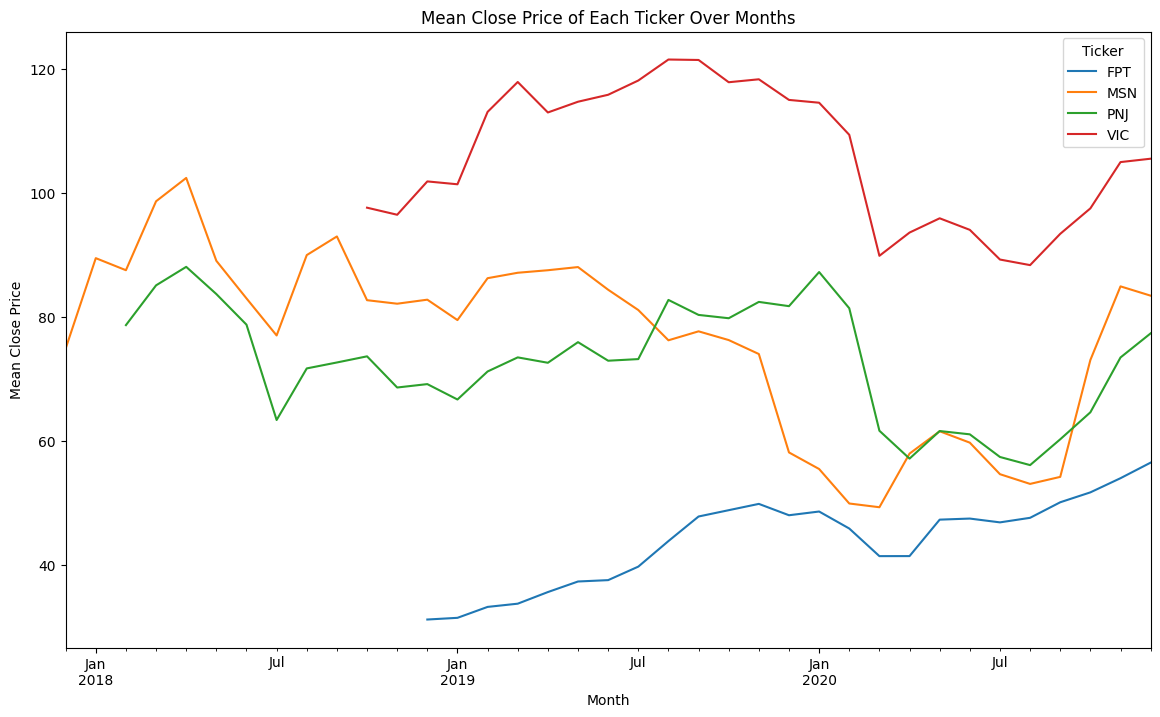

In [9]:
#Question 1



import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset and parse Date/Time column
df = pd.read_csv("/content/sample_data/Dataset.csv", parse_dates=['Date/Time'])

# Separate Date and Time
df['Date'] = df['Date/Time'].dt.date
df['MonthYear'] = df['Date/Time'].dt.to_period('M')

# Calculate mean close price for each ticker by month
mean_close = df.groupby(['MonthYear', 'Ticker'])['Close'].mean().unstack()

# Plot mean close price over months
mean_close.plot(figsize=(14, 8))
plt.title("Mean Close Price of Each Ticker Over Months")
plt.xlabel("Month")
plt.ylabel("Mean Close Price")
plt.legend(title='Ticker')
plt.show()


 Question2.ipynb

In [12]:
import pandas as pd

# Load dataset and parse Date/Time
df = pd.read_csv("/content/sample_data/Dataset.csv", parse_dates=['Date/Time'])

# Filter for "MSN" ticker
msn_data = df[df['Ticker'] == 'MSN'].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Create MonthYear column and calculate monthly return
msn_data['MonthYear'] = msn_data['Date/Time'].dt.to_period('M')
msn_data['MonthlyReturn'] = msn_data.groupby('MonthYear')['Close'].transform(lambda x: x.pct_change().mean())

# Calculate min/max monthly return ratio for each year
yearly_ratio = msn_data.groupby(msn_data['Date/Time'].dt.year)['MonthlyReturn'].agg(['min', 'max'])
yearly_ratio['Ratio'] = yearly_ratio['max'] / yearly_ratio['min']

# Find the year with the minimum ratio
min_ratio_year = yearly_ratio['Ratio'].idxmin()

print("Year with minimum ratio of highest to lowest average monthly return for MSN Ticker:", min_ratio_year)


Year with minimum ratio of highest to lowest average monthly return for MSN Ticker: 2020


Question3.ipynb

In [15]:
import pandas as pd

# Load the dataset and parse Date/Time
df = pd.read_csv('/content/sample_data/Dataset.csv', parse_dates=['Date/Time'])

# Filter for "PNJ" ticker and calculate return
pnj_data = df[df['Ticker'] == 'PNJ'].copy()  # Use .copy() to avoid SettingWithCopyWarning
pnj_data['Return'] = pnj_data['Close'].pct_change() * 100

# Create Performance column with NEGATIVE, POSITIVE, and NEUTRAL categories
pnj_data['Performance'] = pd.cut(
    pnj_data['Return'],
    bins=[-float("inf"), 0, float("inf")],
    labels=["NEGATIVE", "POSITIVE"],
    right=False
).astype('category')  # Convert to categorical type

# Replace NaN values with "NEUTRAL" in the Performance column
pnj_data['Performance'] = pnj_data['Performance'].cat.add_categories("NEUTRAL").fillna("NEUTRAL")

# Filter for specific time range on March 1, 2018
pnj_data['Date'] = pnj_data['Date/Time'].dt.date
pnj_data['Time'] = pnj_data['Date/Time'].dt.time
filtered_data = pnj_data[
    (pnj_data['Date'] == pd.to_datetime('2018-03-01').date()) &
    (pnj_data['Time'] >= pd.to_datetime('10:50:00').time()) &
    (pnj_data['Time'] <= pd.to_datetime('13:05:00').time())
]

# Count and calculate performance categories
performance_counts = filtered_data['Performance'].value_counts()
total_count = performance_counts.sum()
performance_percentages = (performance_counts / total_count) * 100

print("Performance Counts:", performance_counts)
print("Performance Percentages:", performance_percentages)


Performance Counts: Performance
POSITIVE    22
NEGATIVE     6
NEUTRAL      0
Name: count, dtype: int64
Performance Percentages: Performance
POSITIVE    78.571429
NEGATIVE    21.428571
NEUTRAL      0.000000
Name: count, dtype: float64


Question4.ipynb

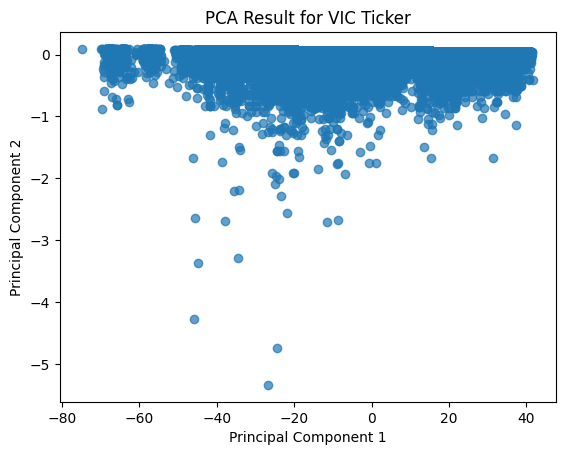

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset and filter for "VIC" ticker
df = pd.read_csv('/content/sample_data/Dataset.csv')
vic_data = df[df['Ticker'] == 'VIC'][['Open', 'Close', 'High', 'Low']].dropna()

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vic_data)

# Plot PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title("PCA Result for VIC Ticker")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Question5.ipynb


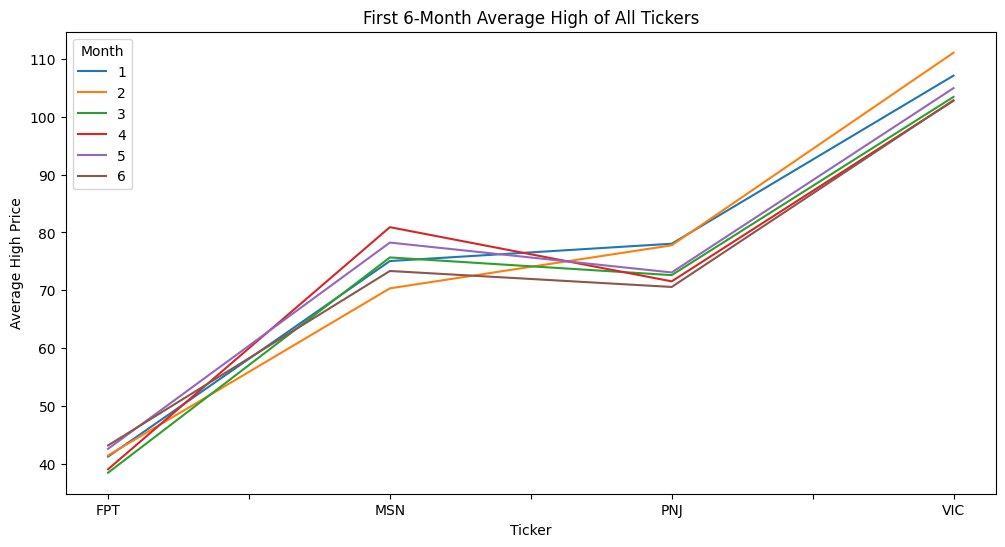

Highest average High in 4th month: VIC
3rd lowest average High in 6th month: MSN


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset and parse Date/Time
df = pd.read_csv('/content/sample_data/Dataset.csv', parse_dates=['Date/Time'])
df['Month'] = df['Date/Time'].dt.month

# Calculate monthly average high for each ticker for the first 6 months
monthly_high = df.groupby(['Ticker', 'Month'])['High'].mean().unstack().iloc[:, :6]

# Plot
monthly_high.plot(figsize=(12, 6))
plt.title("First 6-Month Average High of All Tickers")
plt.xlabel("Ticker")
plt.ylabel("Average High Price")
plt.legend(title='Month')
plt.show()

# Find tickers with specified conditions
highest_4th_month = monthly_high[4].idxmax()
third_lowest_6th_month = monthly_high[6].nsmallest(3).idxmax()

print("Highest average High in 4th month:", highest_4th_month)
print("3rd lowest average High in 6th month:", third_lowest_6th_month)


Question6.ipynb

In [19]:
import pandas as pd

# Load dataset and parse Date/Time
df = pd.read_csv('/content/sample_data/Dataset.csv', parse_dates=['Date/Time'])

# Create a MonthYear column to group by month in 2019
df['MonthYear'] = df['Date/Time'].dt.to_period('M')
monthly_data_2019 = df[df['MonthYear'].dt.year == 2019].groupby(['MonthYear', 'Ticker']).mean()

# Select only the numeric columns for Open, High, Low, Close to perform rolling calculations
rolling_mean = monthly_data_2019[['Open', 'High', 'Low', 'Close']].rolling(window=12).mean()
rolling_std = monthly_data_2019[['Open', 'High', 'Low', 'Close']].rolling(window=12).std()

# Ratio of rolling mean to rolling std, dropping rows with null values
ratio = rolling_mean / rolling_std
ratio.dropna(how='all', inplace=True)

# Calculate covariance between (Open, High) and (Low, Close) without using built-in functions
# Step 1: Mean center the columns
monthly_data_2019['Open_Center'] = monthly_data_2019['Open'] - monthly_data_2019['Open'].mean()
monthly_data_2019['High_Center'] = monthly_data_2019['High'] - monthly_data_2019['High'].mean()
monthly_data_2019['Low_Center'] = monthly_data_2019['Low'] - monthly_data_2019['Low'].mean()
monthly_data_2019['Close_Center'] = monthly_data_2019['Close'] - monthly_data_2019['Close'].mean()

# Step 2: Calculate covariance manually
monthly_data_2019['Covariance_Open_High'] = monthly_data_2019['Open_Center'] * monthly_data_2019['High_Center']
monthly_data_2019['Covariance_Low_Close'] = monthly_data_2019['Low_Center'] * monthly_data_2019['Close_Center']

# Output the ratio and covariance calculations
print("Rolling mean to rolling std ratio:")
print(ratio)
print("\nCovariances between (Open, High) and (Low, Close):")
print(monthly_data_2019[['Covariance_Open_High', 'Covariance_Low_Close']])


Rolling mean to rolling std ratio:
                      Open      High       Low     Close
MonthYear Ticker                                        
2019-03   VIC     2.512140  2.513271  2.511409  2.512018
2019-04   FPT     2.569566  2.570798  2.568751  2.569431
          MSN     2.574371  2.575689  2.573484  2.574237
          PNJ     2.601241  2.602745  2.600254  2.601132
          VIC     2.540387  2.542025  2.539231  2.540265
2019-05   FPT     2.596097  2.597833  2.594847  2.595965
          MSN     2.596512  2.598262  2.595252  2.596380
          PNJ     2.614998  2.616987  2.613579  2.614840
          VIC     2.603988  2.606045  2.602517  2.603825
2019-06   FPT     2.658353  2.660554  2.656766  2.658190
          MSN     2.656300  2.658472  2.654730  2.656136
          PNJ     2.653951  2.656139  2.652486  2.653874
          VIC     2.670605  2.672874  2.669030  2.670527
2019-07   FPT     2.731076  2.733490  2.729389  2.730989
          MSN     2.724624  2.726955  2.722991  2.724

Question7.ipynb


In [21]:
import pandas as pd

# Load dataset and parse Date/Time
df = pd.read_csv('/content/sample_data/Dataset.csv', parse_dates=['Date/Time'])

# Filter for "PNJ" ticker and make a copy to avoid SettingWithCopyWarning
pnj_data = df[df['Ticker'] == 'PNJ'].copy()

# Calculate the 3rd lagged autocorrelation of Volume for the entire column
volume_lag3_ac = pnj_data['Volume'].autocorr(lag=3)

# Add the calculated autocorrelation as a constant column
pnj_data['Volume_lag3_ac'] = volume_lag3_ac

# Calculate the ratio of Volume to the 3rd lagged autocorrelation
pnj_data['Ratio'] = pnj_data['Volume'] / pnj_data['Volume_lag3_ac']

# Sort by the ratio and get the Volume with the 10th smallest ratio
tenth_smallest_ratio_volume = pnj_data.nsmallest(10, 'Ratio').iloc[-1]['Volume']

print("Volume with the 10th smallest ratio:", tenth_smallest_ratio_volume)


Volume with the 10th smallest ratio: 1


Question8.ipynb

In [22]:
import pandas as pd

# Load dataset and select data for chosen ticker on Wednesdays
df = pd.read_csv('/content/sample_data/Dataset.csv', parse_dates=['Date/Time'])
df['Day'] = df['Date/Time'].dt.day_name()

ticker_data = df[(df['Ticker'] == 'MSN') & (df['Day'] == 'Wednesday')]

ticker_data['Ratio'] = (ticker_data['Volume'] - ticker_data['Volume'].shift(2)) / (ticker_data['Volume'] + ticker_data['Volume'].shift(2))
average_ratio = ticker_data['Ratio'].mean().round(6)

print("Average ratio:", average_ratio)


Average ratio: 0.000201


<ipython-input-22-87c205875ecd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Ratio'] = (ticker_data['Volume'] - ticker_data['Volume'].shift(2)) / (ticker_data['Volume'] + ticker_data['Volume'].shift(2))


In [ ]:
f